## Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it. First, load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_expec_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

## Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [2]:
for column_name in life_expec_df:
        print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))

Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life expectancy  : 0.34036759700476515
Percent null values in Adult Mortality : 0.34036759700476515
Percent null values in infant deaths : 0.0
Percent null values in Alcohol : 6.603131381892444
Percent null values in percentage expenditure : 0.0
Percent null values in Hepatitis B : 18.82232811436351
Percent null values in Measles  : 0.0
Percent null values in  BMI  : 1.1572498298162015
Percent null values in under-five deaths  : 0.0
Percent null values in Polio : 0.6466984343090538
Percent null values in Total expenditure : 7.6923076923076925
Percent null values in Diphtheria  : 0.6466984343090538
Percent null values in  HIV/AIDS : 0.0
Percent null values in GDP : 15.248468345813478
Percent null values in Population : 22.19196732471069
Percent null values in  thinness  1-19 years : 1.1572498298162015
Percent null values in  thinness 5-9 years : 1.15724982981

Missing values: I think using imputation within each country is the best method because the values can't be assumed to be continuous across different countries, or potentially even within a country. This is why I replaced NaN values with the mean value for that country and data column. 

In [3]:
countries = life_expec_df["Country"].unique()
fill_list = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure',
            'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 
             'Income composition of resources', 'Schooling']

for col in fill_list:
    for country in countries:
        life_expec_df.loc[life_expec_df["Country"] == country, col] = life_expec_df.loc[life_expec_df["Country"] == country, col].fillna(
            life_expec_df[life_expec_df["Country"] == country][col].mean())
        
for column_name in life_expec_df:
        print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))

Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life expectancy  : 0.34036759700476515
Percent null values in Adult Mortality : 0.34036759700476515
Percent null values in infant deaths : 0.0
Percent null values in Alcohol : 0.5786249149081008
Percent null values in percentage expenditure : 0.0
Percent null values in Hepatitis B : 4.901293396868618
Percent null values in Measles  : 0.0
Percent null values in  BMI  : 1.1572498298162015
Percent null values in under-five deaths  : 0.0
Percent null values in Polio : 0.0
Percent null values in Total expenditure : 1.0891763104152485
Percent null values in Diphtheria  : 0.0
Percent null values in  HIV/AIDS : 0.0
Percent null values in GDP : 13.78488767869299
Percent null values in Population : 22.05582028590878
Percent null values in  thinness  1-19 years : 1.1572498298162015
Percent null values in  thinness 5-9 years : 1.1572498298162015
Percent null values in I

Using imputation helped decrease the number of NaN values in Alcohol, Hepatitis B, Polio, Total Expenditure, Diptheria and GDP. Unfortunately there is still a big problem in the Population column. I see three ways to handle this problem: use imputation across all countries, drop the rows containing NaN values, or drop the Population and GDP columns. The benefit of using imputation across all countries would be that all of the other data contained in other columns would be preserved, the problem would be that I would be spiking the mean value, invalidating the Population and GDP column information. The benefit of dropping the rows would be that I would preserve only actual data but the cost would be tremendous. I would lose all information on over 20% of the data set, potentially corrupting the entire set. Lastly the benefit of dropping the Population and GDP columns and then dropping the NaN's that are left would be that I would be removing two factors but preserving the rest of the information. 

After weighing the options I feel that using imputation across countries is the best approach. The GDP and Population columns will be significantly corrupted but I will preserve the other information that those countries contain. 

In [4]:
for col in fill_list:
    life_expec_df.loc[:,col] = life_expec_df.loc[:,col].fillna(life_expec_df.loc[:,col].mean())
    
for column_name in life_expec_df:
        print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))

Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life expectancy  : 0.0
Percent null values in Adult Mortality : 0.0
Percent null values in infant deaths : 0.0
Percent null values in Alcohol : 0.0
Percent null values in percentage expenditure : 0.0
Percent null values in Hepatitis B : 0.0
Percent null values in Measles  : 0.0
Percent null values in  BMI  : 0.0
Percent null values in under-five deaths  : 0.0
Percent null values in Polio : 0.0
Percent null values in Total expenditure : 0.0
Percent null values in Diphtheria  : 0.0
Percent null values in  HIV/AIDS : 0.0
Percent null values in GDP : 0.0
Percent null values in Population : 0.0
Percent null values in  thinness  1-19 years : 0.0
Percent null values in  thinness 5-9 years : 0.0
Percent null values in Income composition of resources : 0.0
Percent null values in Schooling : 0.0


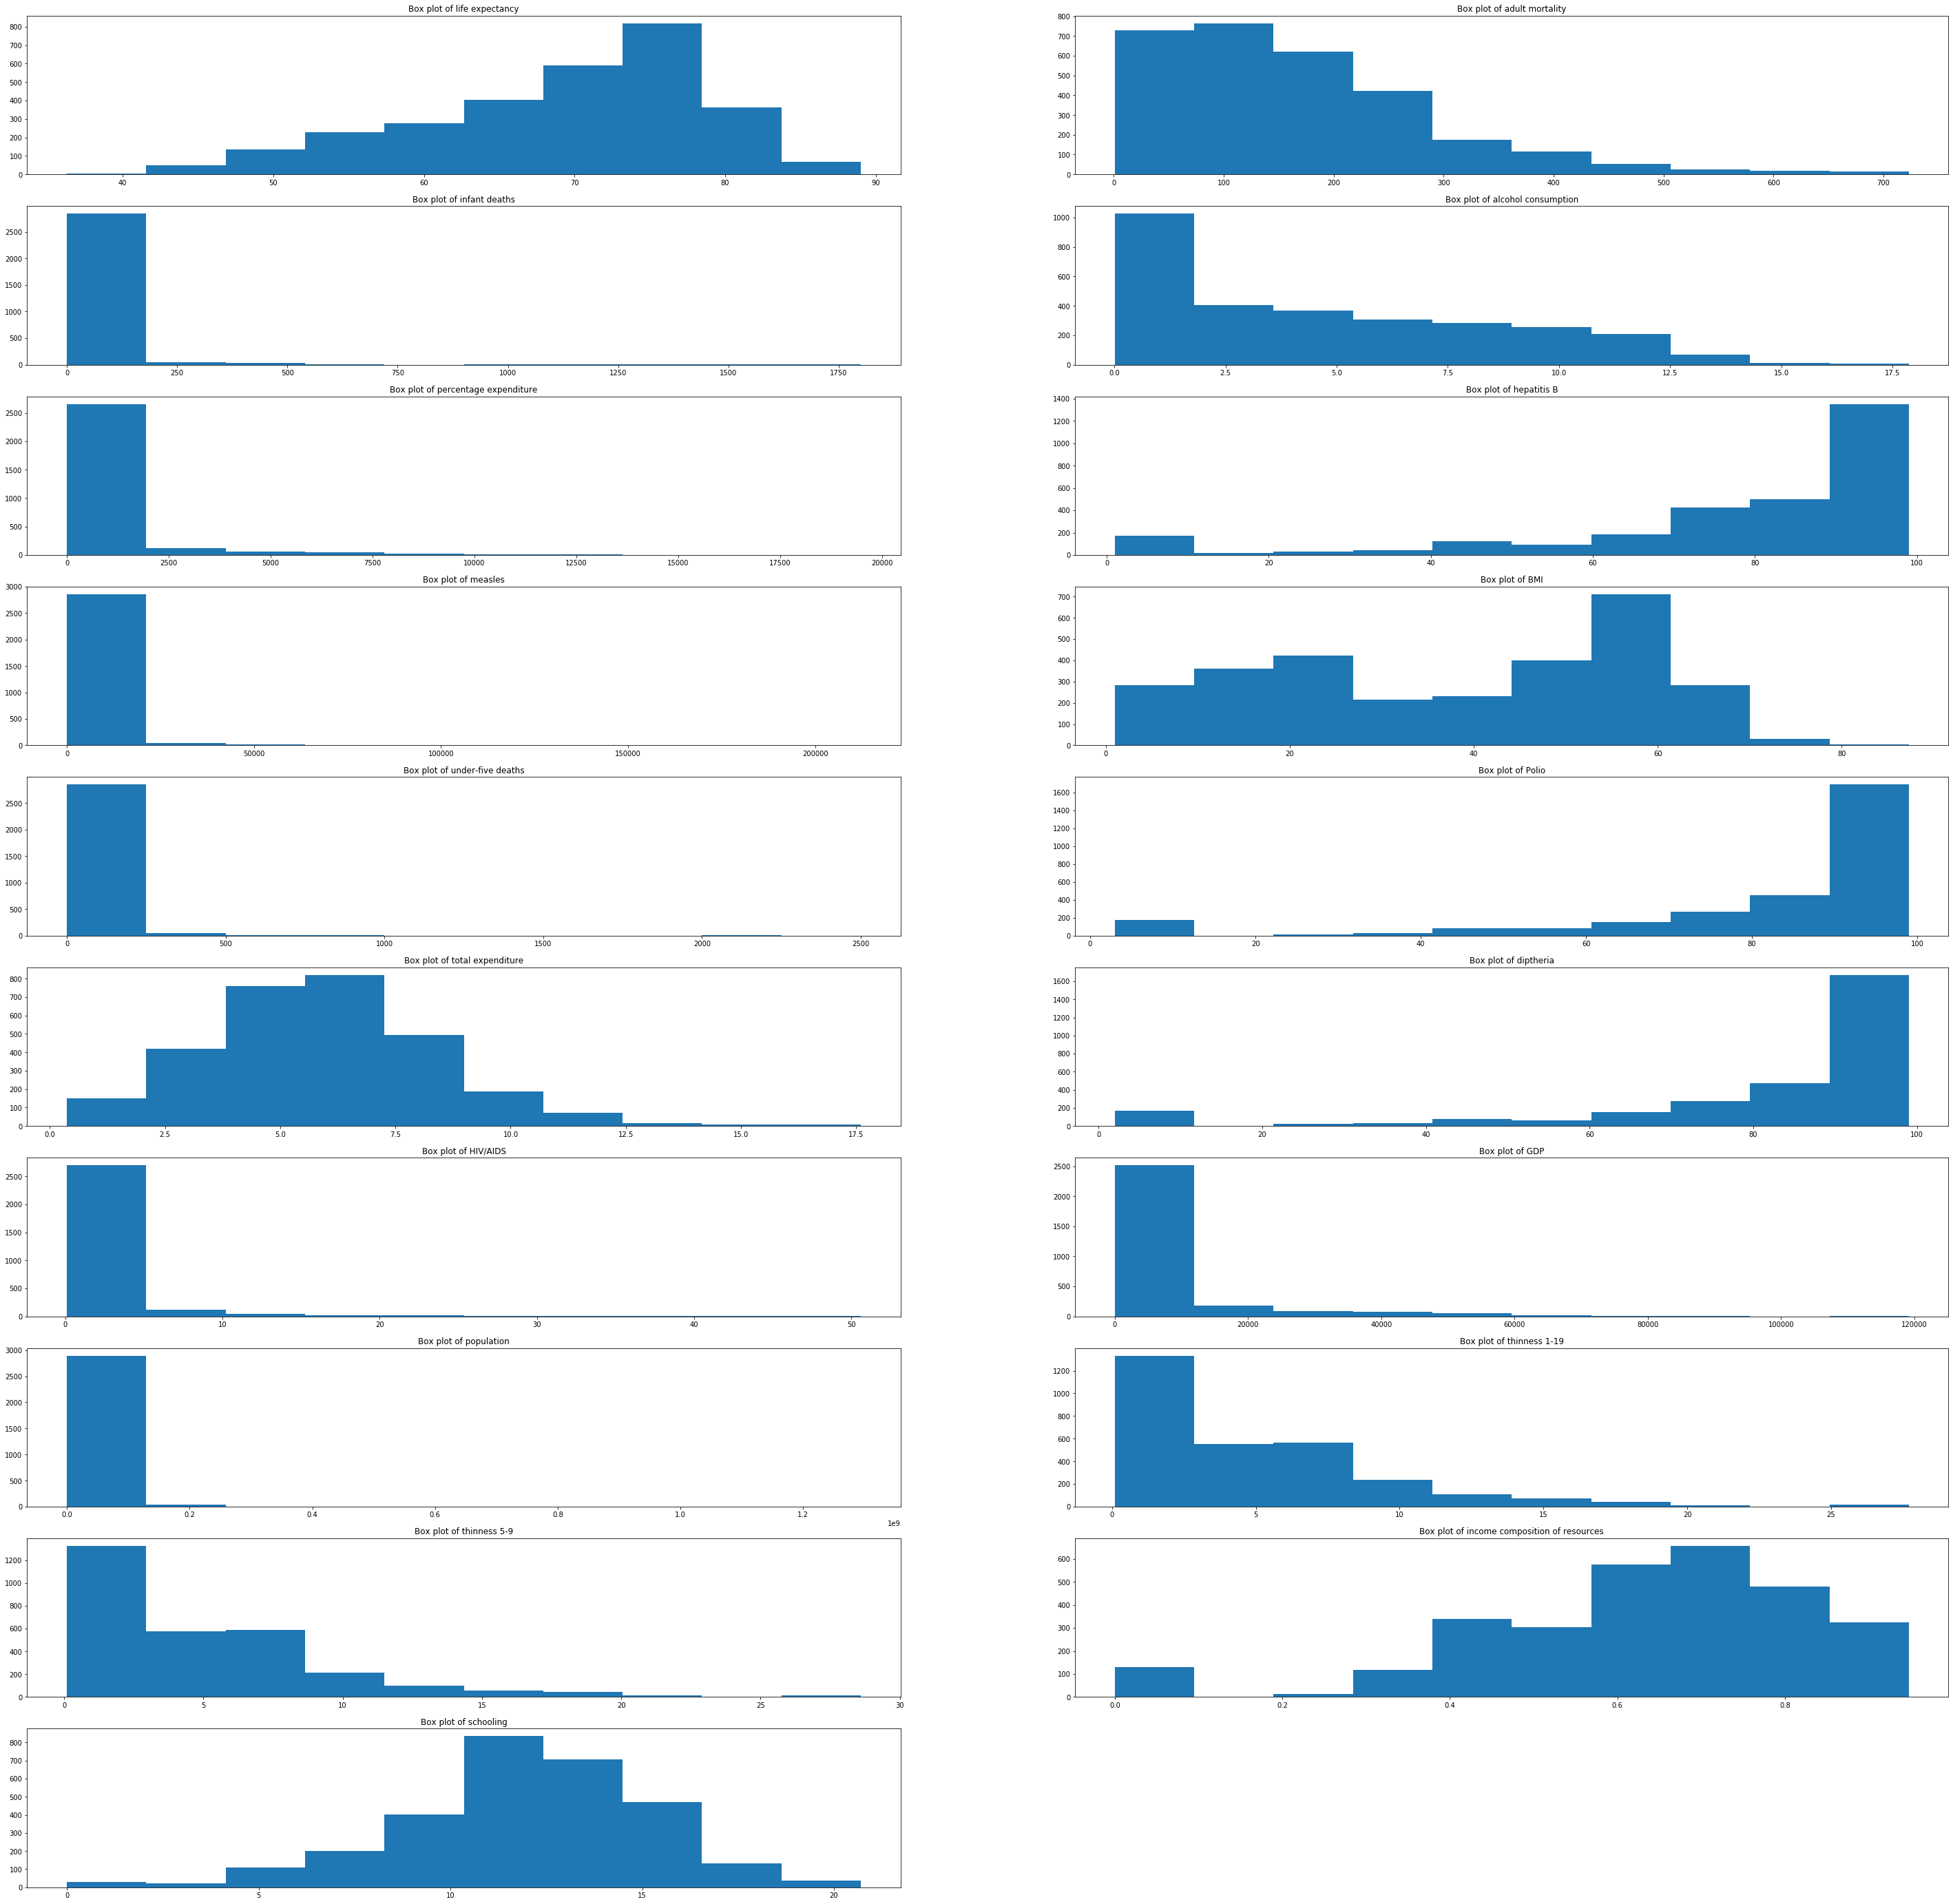

In [5]:
plt.figure(figsize = (50,50))

plt.subplot(10,2,1)
plt.hist(life_expec_df['Life expectancy '])
plt.title("Box plot of life expectancy")

plt.subplot(10,2,2)
plt.hist(life_expec_df['Adult Mortality'])
plt.title("Box plot of adult mortality")

plt.subplot(10,2,3)
plt.hist(life_expec_df['infant deaths'])
plt.title("Box plot of infant deaths")

plt.subplot(10,2,4)
plt.hist(life_expec_df['Alcohol'])
plt.title("Box plot of alcohol consumption")

plt.subplot(10,2,5)
plt.hist(life_expec_df['percentage expenditure'])
plt.title("Box plot of percentage expenditure")

plt.subplot(10,2,6)
plt.hist(life_expec_df['Hepatitis B'])
plt.title("Box plot of hepatitis B")

plt.subplot(10,2,7)
plt.hist(life_expec_df['Measles '])
plt.title("Box plot of measles")

plt.subplot(10,2,8)
plt.hist(life_expec_df[' BMI '])
plt.title("Box plot of BMI")

plt.subplot(10,2,9)
plt.hist(life_expec_df['under-five deaths '])
plt.title("Box plot of under-five deaths")

plt.subplot(10,2,10)
plt.hist(life_expec_df['Polio'])
plt.title("Box plot of Polio")

plt.subplot(10,2,11)
plt.hist(life_expec_df['Total expenditure'])
plt.title("Box plot of total expenditure")

plt.subplot(10,2,12)
plt.hist(life_expec_df['Diphtheria '])
plt.title("Box plot of diptheria")

plt.subplot(10,2,13)
plt.hist(life_expec_df[' HIV/AIDS'])
plt.title("Box plot of HIV/AIDS")

plt.subplot(10,2,14)
plt.hist(life_expec_df['GDP'])
plt.title("Box plot of GDP")

plt.subplot(10,2,15)
plt.hist(life_expec_df['Population'])
plt.title("Box plot of population")

plt.subplot(10,2,16)
plt.hist(life_expec_df[' thinness  1-19 years'])
plt.title("Box plot of thinness 1-19")

plt.subplot(10,2,17)
plt.hist(life_expec_df[' thinness 5-9 years'])
plt.title("Box plot of thinness 5-9")

plt.subplot(10,2,18)
plt.hist(life_expec_df['Income composition of resources'])
plt.title("Box plot of income composition of resources")

plt.subplot(10,2,19)
plt.hist(life_expec_df['Schooling'])
plt.title("Box plot of schooling")

plt.show()

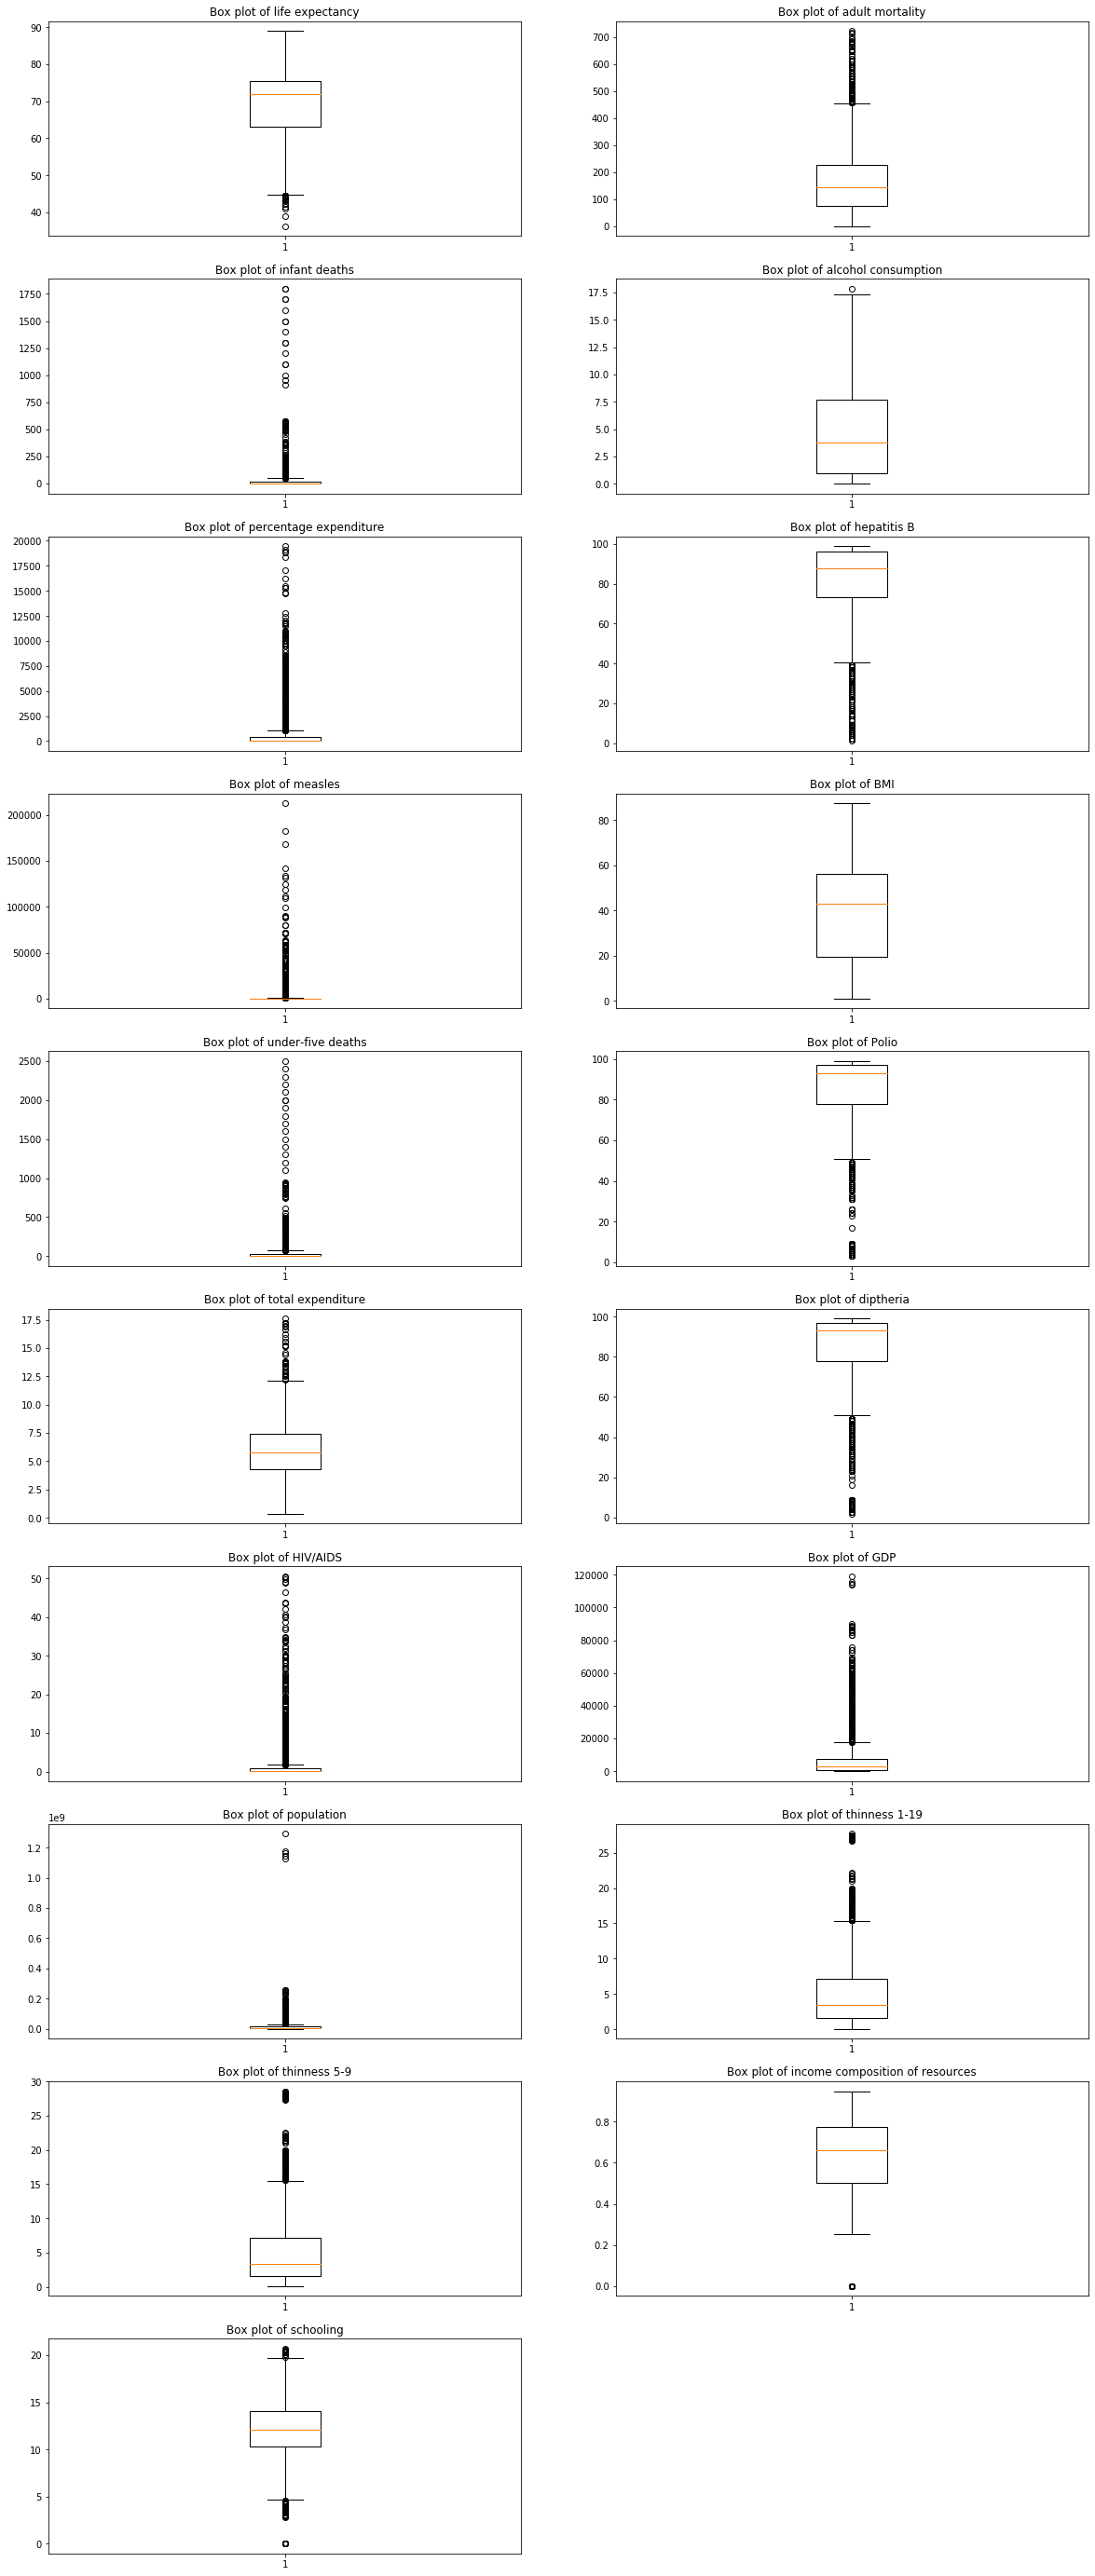

In [6]:
plt.figure(figsize = (20,50))

plt.subplot(10,2,1)
plt.boxplot(life_expec_df['Life expectancy '])
plt.title("Box plot of life expectancy")

plt.subplot(10,2,2)
plt.boxplot(life_expec_df['Adult Mortality'])
plt.title("Box plot of adult mortality")

plt.subplot(10,2,3)
plt.boxplot(life_expec_df['infant deaths'])
plt.title("Box plot of infant deaths")

plt.subplot(10,2,4)
plt.boxplot(life_expec_df['Alcohol'])
plt.title("Box plot of alcohol consumption")

plt.subplot(10,2,5)
plt.boxplot(life_expec_df['percentage expenditure'])
plt.title("Box plot of percentage expenditure")

plt.subplot(10,2,6)
plt.boxplot(life_expec_df['Hepatitis B'])
plt.title("Box plot of hepatitis B")

plt.subplot(10,2,7)
plt.boxplot(life_expec_df['Measles '])
plt.title("Box plot of measles")

plt.subplot(10,2,8)
plt.boxplot(life_expec_df[' BMI '])
plt.title("Box plot of BMI")

plt.subplot(10,2,9)
plt.boxplot(life_expec_df['under-five deaths '])
plt.title("Box plot of under-five deaths")

plt.subplot(10,2,10)
plt.boxplot(life_expec_df['Polio'])
plt.title("Box plot of Polio")

plt.subplot(10,2,11)
plt.boxplot(life_expec_df['Total expenditure'])
plt.title("Box plot of total expenditure")

plt.subplot(10,2,12)
plt.boxplot(life_expec_df['Diphtheria '])
plt.title("Box plot of diptheria")

plt.subplot(10,2,13)
plt.boxplot(life_expec_df[' HIV/AIDS'])
plt.title("Box plot of HIV/AIDS")

plt.subplot(10,2,14)
plt.boxplot(life_expec_df['GDP'])
plt.title("Box plot of GDP")

plt.subplot(10,2,15)
plt.boxplot(life_expec_df['Population'])
plt.title("Box plot of population")

plt.subplot(10,2,16)
plt.boxplot(life_expec_df[' thinness  1-19 years'])
plt.title("Box plot of thinness 1-19")

plt.subplot(10,2,17)
plt.boxplot(life_expec_df[' thinness 5-9 years'])
plt.title("Box plot of thinness 5-9")

plt.subplot(10,2,18)
plt.boxplot(life_expec_df['Income composition of resources'])
plt.title("Box plot of income composition of resources")

plt.subplot(10,2,19)
plt.boxplot(life_expec_df['Schooling'])
plt.title("Box plot of schooling")

plt.show()

In [7]:
#life_expec_df.loc[life_expec_df["Life expectancy "] < 40, ['Country', 'Year', 'Life expectancy ']] Haiti 2010 doesn't seem right, but perhaps due to the earthquake.
#life_expec_df.loc[life_expec_df["infant deaths"] > 1000, ['Country', 'Year', 'infant deaths']] Over 1,000 deaths per 1,000 people...
#life_expec_df.loc[life_expec_df["percentage expenditure"] > 15000, ['Country', 'Year', 'percentage expenditure']]
#life_expec_df.loc[life_expec_df["Measles "] > 100000, ['Country', 'Year', 'Measles ']]
#life_expec_df.loc[life_expec_df["under-five deaths "] > 1000, ['Country', 'Year', 'under-five deaths ']] Matches infant data
#life_expec_df.loc[life_expec_df["Schooling"] == 0, ['Country', 'Year', 'Schooling']] Quite a few reporting 0 years.
#life_expec_df.loc[life_expec_df["Income composition of resources"] == 0, ['Country', 'Year', 'Income composition of resources']]
#life_expec_df.loc[life_expec_df["GDP"] > 100000, ['Country', 'Year', 'GDP']]
#life_expec_df.loc[life_expec_df["infant deaths"] == 0, ['Country', 'Year', 'infant deaths']]
#life_expec_df.loc[life_expec_df["percentage expenditure"] == 0, ['Country', 'Year', 'percentage expenditure']]
#life_expec_df.loc[life_expec_df["Measles "] == 0, ['Country', 'Year', 'Measles ']]
#life_expec_df.loc[life_expec_df["under-five deaths "] == 0, ['Country', 'Year', 'under-five deaths ']]


I found that there are 848 rows of data with 0 infant deaths per 1,000 people. That seems a bit strange, especially for an island country like Vanuatu where malaria is a big problem. The same problem exists for percentage expenditure, Measles and under-five deaths.

As stated above, I have a lot of zero values that don't make sense. I could either replace them with the country/global mean, winsorize the data, or drop them. The problem with winsorization is that instead of having the values bunch up at zero I'd have them bunch up at the 95th percentile for example. I think replacing them by the mean will have a less detrimental effect overall. 

In [8]:
life_expec_df = life_expec_df.replace(to_replace=0, value=np.nan)
life_expec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2090 non-null float64
Alcohol                            2938 non-null float64
percentage expenditure             2327 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            1955 non-null float64
 BMI                               2938 non-null float64
under-five deaths                  2153 non-null float64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 no

In [9]:
for column_name in life_expec_df:
         print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))

Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life expectancy  : 0.0
Percent null values in Adult Mortality : 0.0
Percent null values in infant deaths : 28.863172226004085
Percent null values in Alcohol : 0.0
Percent null values in percentage expenditure : 20.79646017699115
Percent null values in Hepatitis B : 0.0
Percent null values in Measles  : 33.45813478556841
Percent null values in  BMI  : 0.0
Percent null values in under-five deaths  : 26.718856364874064
Percent null values in Polio : 0.0
Percent null values in Total expenditure : 0.0
Percent null values in Diphtheria  : 0.0
Percent null values in  HIV/AIDS : 0.0
Percent null values in GDP : 0.0
Percent null values in Population : 0.0
Percent null values in  thinness  1-19 years : 0.0
Percent null values in  thinness 5-9 years : 0.0
Percent null values in Income composition of resources : 4.424778761061947
Percent null values in Schooling : 0.953

In [10]:
# Fix the column headings
life_expec_df = life_expec_df.rename(columns={"Life expectancy ": "Life Expectancy", "infant deaths": "Infant Deaths", "percentage expenditure": "Percent Expenditure", "Measles ": "Measles", " BMI ": "BMI", "under-five deaths ": "Under-Five Deaths", "Total expenditure": "Total Expenditure", "Diphtheria ": "Diphtheria", " HIV/AIDS":"HIV/AIDS", " thinness  1-19 years": "Thinness 1-19 Year Olds", " thinness 5-9 years": "Thinness 5-9 Year Olds", "Income composition of resources": "Income Composition"})


fill_list2 = ['Infant Deaths', 'Percent Expenditure', "Measles", "Under-Five Deaths", "Income Composition", "Schooling"]

# Do a country by country imputation to see if we can get rid of some of the zero/NaN values.
for col in fill_list2:
    for country in countries:
        life_expec_df.loc[life_expec_df["Country"] == country, col] = life_expec_df.loc[life_expec_df["Country"] == country, col].fillna(
            life_expec_df[life_expec_df["Country"] == country][col].mean())

for column_name in life_expec_df:
         print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))


Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life Expectancy : 0.0
Percent null values in Adult Mortality : 0.0
Percent null values in Infant Deaths : 25.936010891763104
Percent null values in Alcohol : 0.0
Percent null values in Percent Expenditure : 14.329475833900613
Percent null values in Hepatitis B : 0.0
Percent null values in Measles : 11.23213070115725
Percent null values in BMI : 0.0
Percent null values in Under-Five Deaths : 24.846834581347856
Percent null values in Polio : 0.0
Percent null values in Total Expenditure : 0.0
Percent null values in Diphtheria : 0.0
Percent null values in HIV/AIDS : 0.0
Percent null values in GDP : 0.0
Percent null values in Population : 0.0
Percent null values in Thinness 1-19 Year Olds : 0.0
Percent null values in Thinness 5-9 Year Olds : 0.0
Percent null values in Income Composition : 0.0
Percent null values in Schooling : 0.06807351940095303


By country imputation improved the NaN rates somewhat. I'll now apply global means to fill in the rest. 

In [11]:
for col in fill_list2:
    life_expec_df.loc[:,col] = life_expec_df.loc[:,col].fillna(life_expec_df.loc[:,col].mean())
    
for column_name in life_expec_df:
        print("Percent null values in {} : {}".format(column_name, 100*life_expec_df[column_name].isnull().sum()/life_expec_df[column_name].isnull().count()))

Percent null values in Country : 0.0
Percent null values in Year : 0.0
Percent null values in Status : 0.0
Percent null values in Life Expectancy : 0.0
Percent null values in Adult Mortality : 0.0
Percent null values in Infant Deaths : 0.0
Percent null values in Alcohol : 0.0
Percent null values in Percent Expenditure : 0.0
Percent null values in Hepatitis B : 0.0
Percent null values in Measles : 0.0
Percent null values in BMI : 0.0
Percent null values in Under-Five Deaths : 0.0
Percent null values in Polio : 0.0
Percent null values in Total Expenditure : 0.0
Percent null values in Diphtheria : 0.0
Percent null values in HIV/AIDS : 0.0
Percent null values in GDP : 0.0
Percent null values in Population : 0.0
Percent null values in Thinness 1-19 Year Olds : 0.0
Percent null values in Thinness 5-9 Year Olds : 0.0
Percent null values in Income Composition : 0.0
Percent null values in Schooling : 0.0


In [12]:
win_life_expec_df = pd.DataFrame()
win_life_expec_df["Life Expectancy"] = winsorize(life_expec_df["Life Expectancy"], (0.10, 0))
win_life_expec_df["GDP"] = winsorize(life_expec_df["GDP"], (0, 0.10))
win_life_expec_df["Polio"] = winsorize(life_expec_df["Polio"], (0.10, 0))
win_life_expec_df["Diphtheria"] = winsorize(life_expec_df["Diphtheria"], (0.10, 0))
win_life_expec_df["Percent Expenditure"] = winsorize(life_expec_df["Percent Expenditure"], (0, 0.10))
win_life_expec_df["Schooling"] = winsorize(life_expec_df["Schooling"], (0.10, 0.10))

win_life_expec_df.head()



# life_expec_df["Infant Deaths"] = winsorize(life_expec_df["Infant Deaths"], (0, 0.10))
# life_expec_df["Hepatitis B"] = winsorize(life_expec_df["Hepatitis B"], (0.10, 0))
# life_expec_df["Measles"] = winsorize(life_expec_df["Measles"], (0, 0.10))
# life_expec_df["Under-Five Deaths"] = winsorize(life_expec_df["Under-Five Deaths"], (0, 0.10))
# life_expec_df["Total Expenditure"] = winsorize(life_expec_df["Total Expenditure"], (0, 0.10))
# life_expec_df["HIV/AIDS"] = winsorize(life_expec_df["HIV/AIDS"], (0, 0.20))

# life_expec_df["Population"] = winsorize(life_expec_df["Population"], (0, 0.10))
# life_expec_df["Thinness 1-19 Year Olds"] = winsorize(life_expec_df["Thinness 1-19 Year Olds"], (0, 0.10))
# life_expec_df["Thinness 5-9 Year Olds"] = winsorize(life_expec_df["Thinness 5-9 Year Olds"], (0, 0.10))


,Life Expectancy,GDP,Polio,Diphtheria,Percent Expenditure,Schooling
0,65.0,584.259210,51.0,65.0,71.279624,10.1
1,59.9,612.696514,58.0,62.0,73.523582,10.0
2,59.9,631.744976,62.0,64.0,73.219243,9.9
3,59.5,669.959000,67.0,67.0,78.184215,9.8
4,59.2,63.537231,68.0,68.0,7.097109,9.5


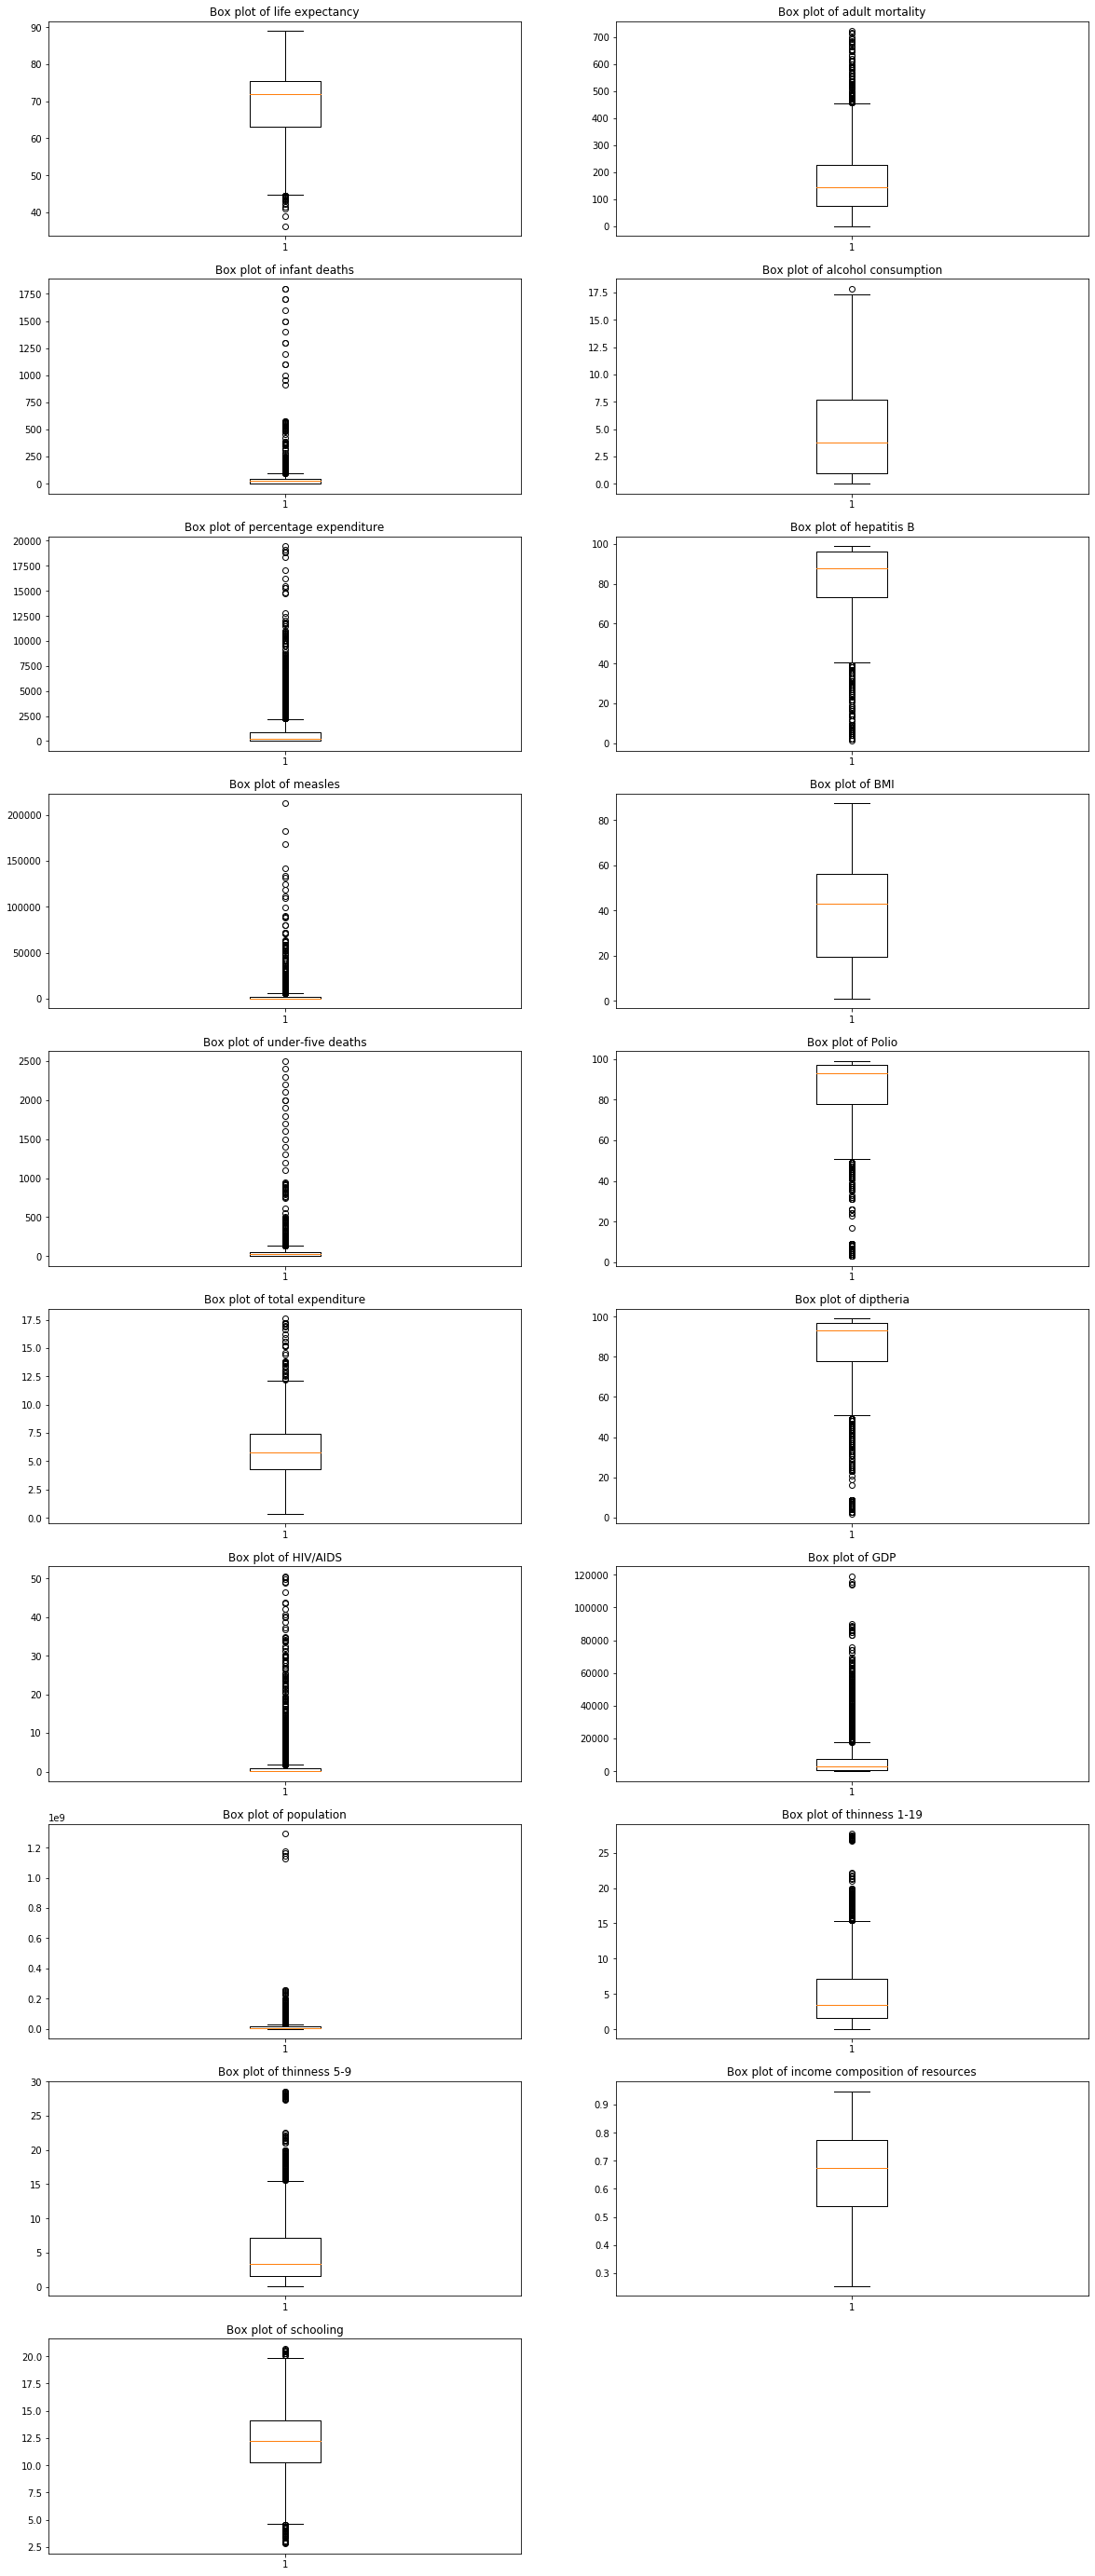

In [13]:
plt.figure(figsize = (20,50))

plt.subplot(10,2,1)
plt.boxplot(life_expec_df['Life Expectancy'])
plt.title("Box plot of life expectancy")

plt.subplot(10,2,2)
plt.boxplot(life_expec_df['Adult Mortality'])
plt.title("Box plot of adult mortality")

plt.subplot(10,2,3)
plt.boxplot(life_expec_df['Infant Deaths'])
plt.title("Box plot of infant deaths")

plt.subplot(10,2,4)
plt.boxplot(life_expec_df['Alcohol'])
plt.title("Box plot of alcohol consumption")

plt.subplot(10,2,5)
plt.boxplot(life_expec_df['Percent Expenditure'])
plt.title("Box plot of percentage expenditure")

plt.subplot(10,2,6)
plt.boxplot(life_expec_df['Hepatitis B'])
plt.title("Box plot of hepatitis B")

plt.subplot(10,2,7)
plt.boxplot(life_expec_df['Measles'])
plt.title("Box plot of measles")

plt.subplot(10,2,8)
plt.boxplot(life_expec_df['BMI'])
plt.title("Box plot of BMI")

plt.subplot(10,2,9)
plt.boxplot(life_expec_df['Under-Five Deaths'])
plt.title("Box plot of under-five deaths")

plt.subplot(10,2,10)
plt.boxplot(life_expec_df['Polio'])
plt.title("Box plot of Polio")

plt.subplot(10,2,11)
plt.boxplot(life_expec_df['Total Expenditure'])
plt.title("Box plot of total expenditure")

plt.subplot(10,2,12)
plt.boxplot(life_expec_df['Diphtheria'])
plt.title("Box plot of diptheria")

plt.subplot(10,2,13)
plt.boxplot(life_expec_df['HIV/AIDS'])
plt.title("Box plot of HIV/AIDS")

plt.subplot(10,2,14)
plt.boxplot(life_expec_df['GDP'])
plt.title("Box plot of GDP")

plt.subplot(10,2,15)
plt.boxplot(life_expec_df['Population'])
plt.title("Box plot of population")

plt.subplot(10,2,16)
plt.boxplot(life_expec_df['Thinness 1-19 Year Olds'])
plt.title("Box plot of thinness 1-19")

plt.subplot(10,2,17)
plt.boxplot(life_expec_df['Thinness 5-9 Year Olds'])
plt.title("Box plot of thinness 5-9")

plt.subplot(10,2,18)
plt.boxplot(life_expec_df['Income Composition'])
plt.title("Box plot of income composition of resources")

plt.subplot(10,2,19)
plt.boxplot(life_expec_df['Schooling'])
plt.title("Box plot of schooling")

plt.show()

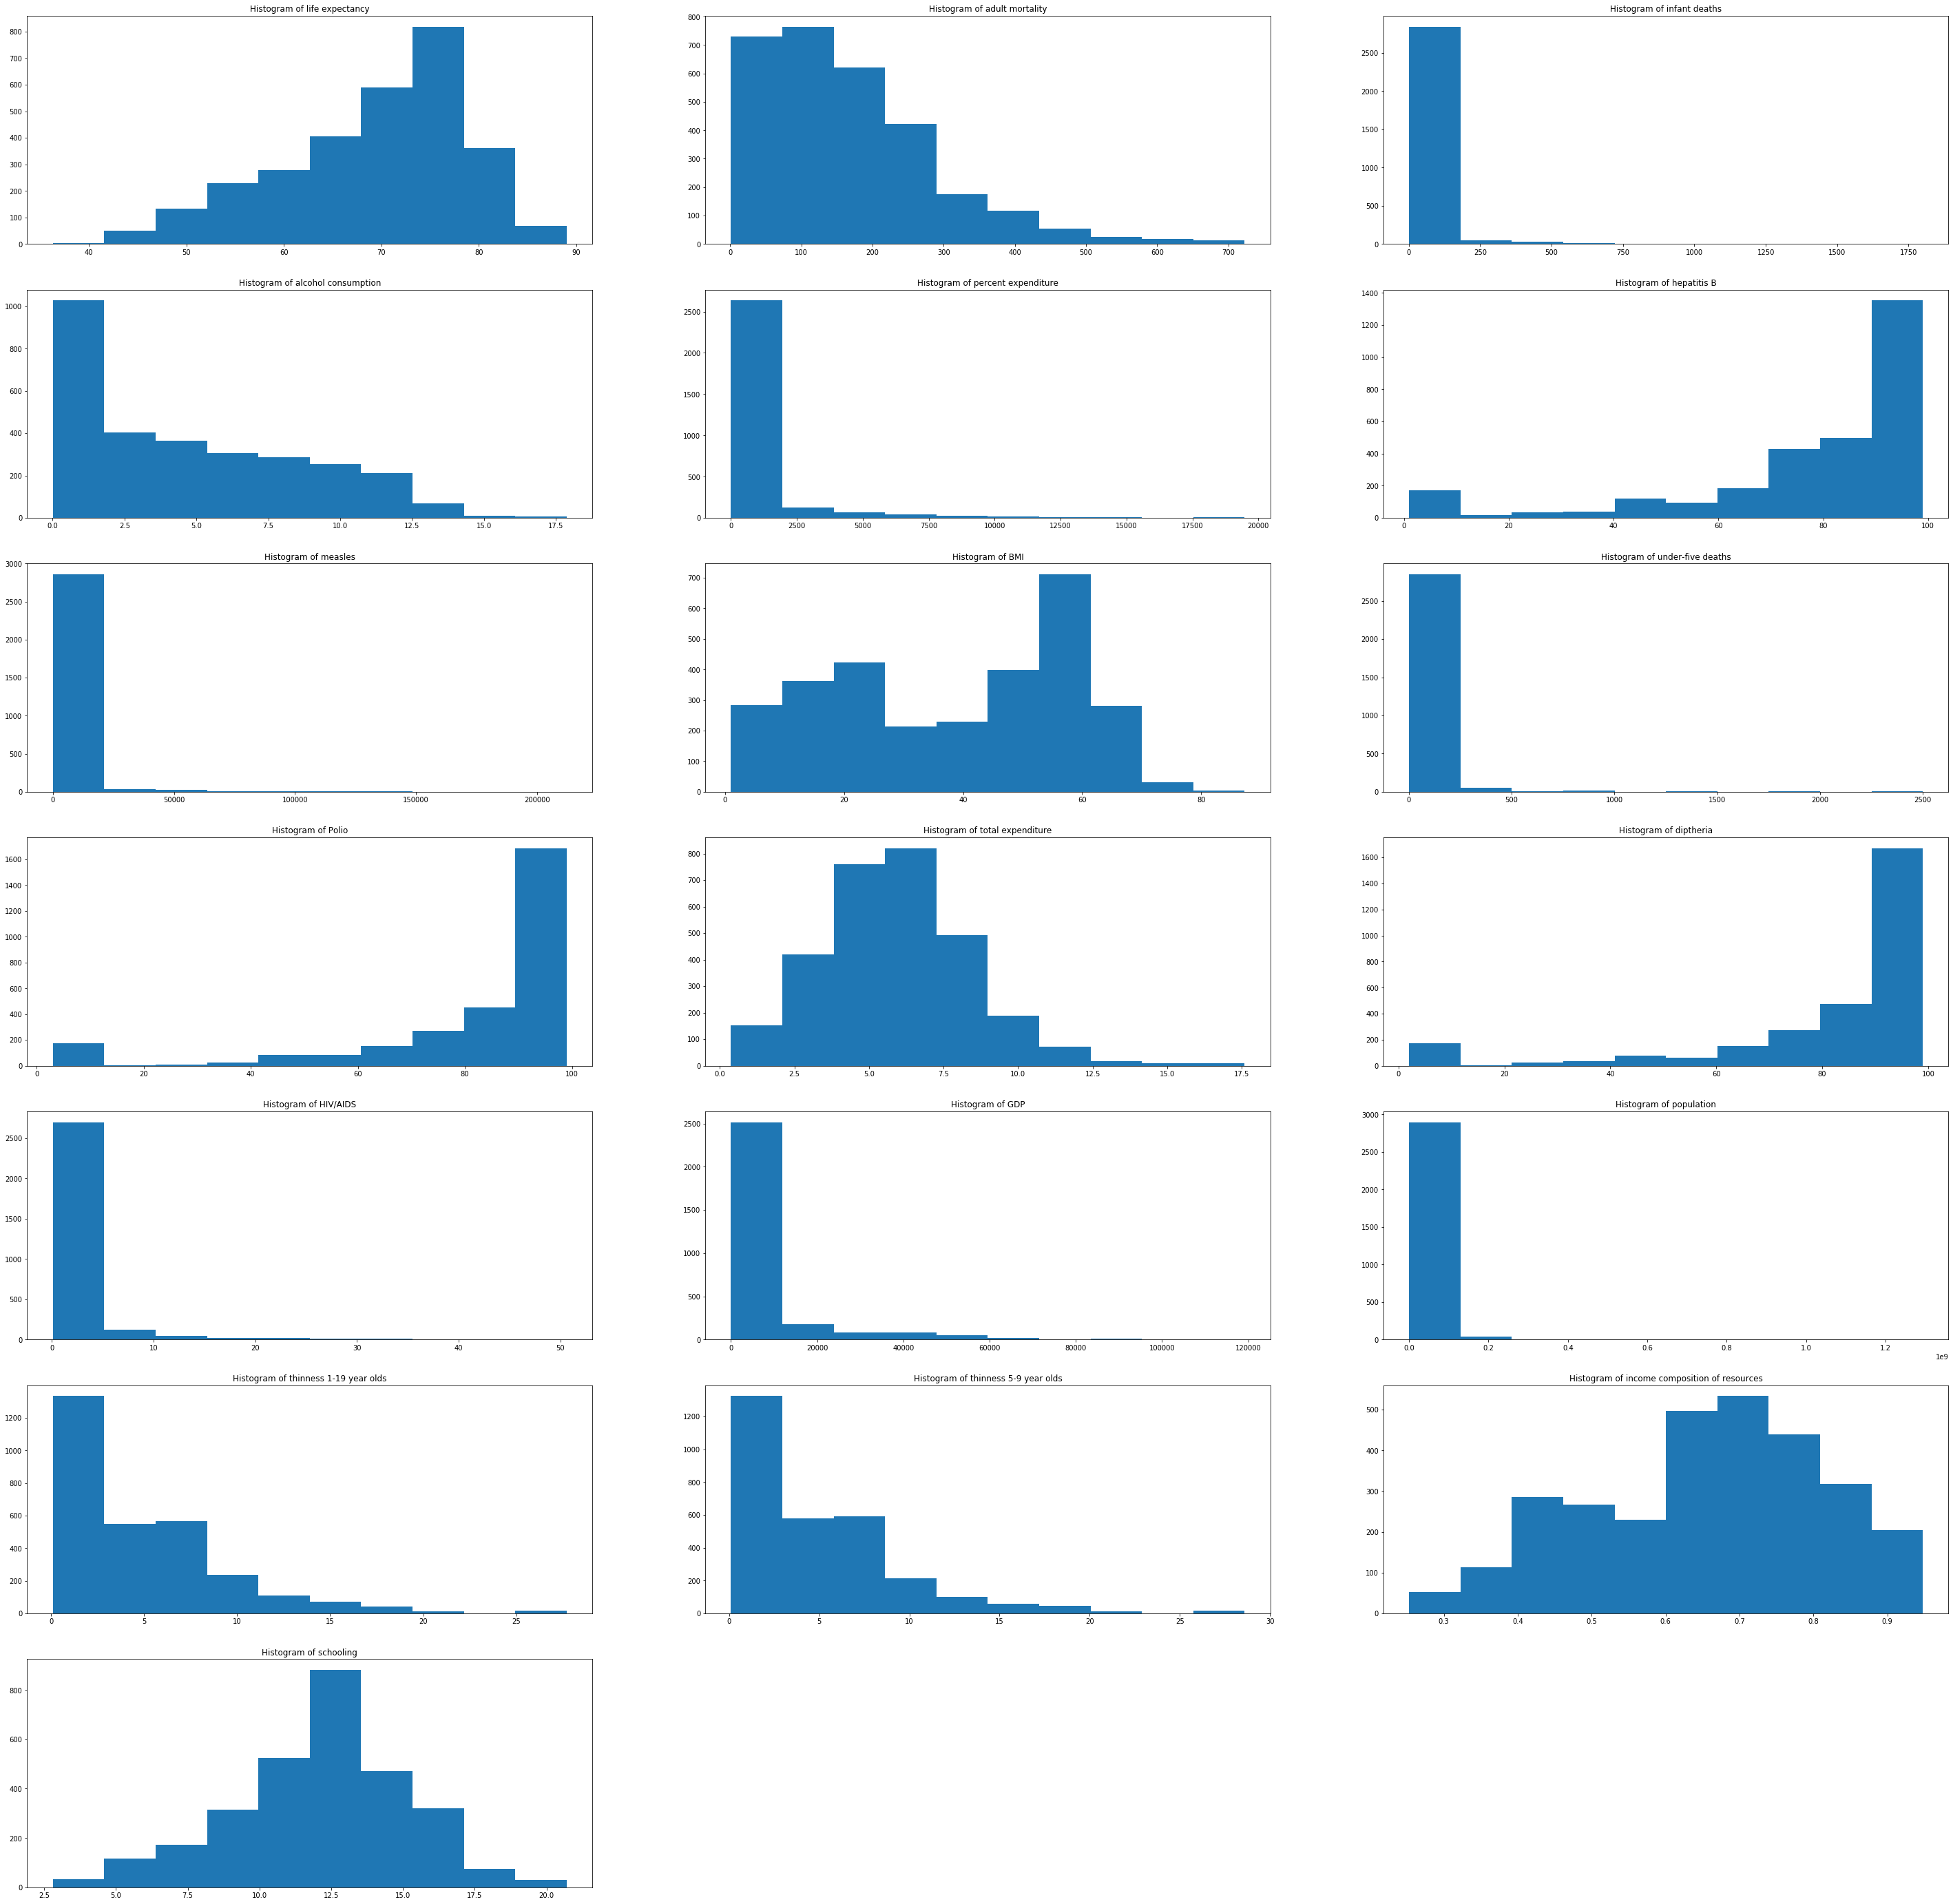

In [14]:
plt.figure(figsize = (50,50))

plt.subplot(7,3,1) # Best
plt.hist(life_expec_df['Life Expectancy'])
plt.title("Histogram of life expectancy")

plt.subplot(7,3,2)
plt.hist(life_expec_df['Adult Mortality'])
plt.title("Histogram of adult mortality")

plt.subplot(7,3,3)
plt.hist(life_expec_df['Infant Deaths'])
plt.title("Histogram of infant deaths")

plt.subplot(7,3,4)
plt.hist(life_expec_df['Alcohol'])
plt.title("Histogram of alcohol consumption")

plt.subplot(7,3,5)
plt.hist(life_expec_df['Percent Expenditure'])
plt.title("Histogram of percent expenditure")

plt.subplot(7,3,6) # Best
plt.hist(life_expec_df['Hepatitis B'])
plt.title("Histogram of hepatitis B")

plt.subplot(7,3,7)
plt.hist(life_expec_df['Measles'])
plt.title("Histogram of measles")

plt.subplot(7,3,8) # Best
plt.hist(life_expec_df['BMI'])
plt.title("Histogram of BMI")

plt.subplot(7,3,9)
plt.hist(life_expec_df['Under-Five Deaths'])
plt.title("Histogram of under-five deaths")

plt.subplot(7,3,10)
plt.hist(life_expec_df['Polio'])
plt.title("Histogram of Polio")

plt.subplot(7,3,11)
plt.hist(life_expec_df['Total Expenditure'])
plt.title("Histogram of total expenditure")

plt.subplot(7,3,12) # Best
plt.hist(life_expec_df['Diphtheria'])
plt.title("Histogram of diptheria")

plt.subplot(7,3,13)
plt.hist(life_expec_df['HIV/AIDS'])
plt.title("Histogram of HIV/AIDS")

plt.subplot(7,3,14)
plt.hist(life_expec_df['GDP'])
plt.title("Histogram of GDP")

plt.subplot(7,3,15)
plt.hist(life_expec_df['Population'])
plt.title("Histogram of population")

plt.subplot(7,3,16)
plt.hist(life_expec_df['Thinness 1-19 Year Olds'])
plt.title("Histogram of thinness 1-19 year olds")

plt.subplot(7,3,17)
plt.hist(life_expec_df['Thinness 5-9 Year Olds'])
plt.title("Histogram of thinness 5-9 year olds")

plt.subplot(7,3,18)
plt.hist(life_expec_df['Income Composition'])
plt.title("Histogram of income composition of resources")

plt.subplot(7,3,19)
plt.hist(life_expec_df['Schooling'])
plt.title("Histogram of schooling")

plt.show()

I winsorized the outliers, which for some features has created a bunching up at the winsorization point (e.g. HIV/AIDS) but has hopefully helped create more normal distributions. 

## Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In [15]:
life_expec_df.groupby("Status").mean()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Year Olds,Thinness 5-9 Year Olds,Income Composition,Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,24.596019,9.849678,2998.867282,84.308269,666.437612,51.803906,31.589193,93.736328,7.554042,93.476562,0.100000,20219.013707,7.937177e+06,1.320703,1.296680,0.831401,15.484285
Developing,2007.522671,67.120177,182.758848,44.408026,3.493100,481.521716,77.453551,3316.540920,35.475772,61.101367,80.002980,5.576311,79.800671,2.088664,4668.432608,1.374722e+07,5.582378,5.624522,0.616816,11.369301


In [16]:

# status = life_expec_df["Status"].unique()
# grouped_df = life_expec_df.groupby("Status")
# for var in ["norm_winsorized_schooling", "norm_winsorized_gdp", "norm_winsorized_diphtheria", "norm_winsorized_bmi"]:
#     print("------------------------------------------------")
#     print("Comparisons for variable: {}".format(var))
#     print("------------------------------------------------")
#     for i in range(0, len(status)):
#         for j in range(i+1, len(status)):
#             print("t-test between groups {0} and {1}:".format(status[i], status[j]))
#             print(stats.ttest_ind(
#                 life_expec_df[life_expec_df["Status"]==status[i]][var], 
#                 life_expec_df[life_expec_df["Status"]==status[j]][var]
#             ))

In [17]:
life_expec_df.corr()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Year Olds,Thinness 5-9 Year Olds,Income Composition,Schooling
Year,1.000000,0.169623,-0.078861,-0.036650,-0.047276,0.072044,0.138707,-0.079985,0.108327,-0.042281,0.097369,0.081714,0.136900,-0.139741,0.093166,0.014599,-0.047592,-0.050627,0.140985,0.187230
Life Expectancy,0.169623,1.000000,-0.696359,-0.141578,0.404155,0.405199,0.299971,-0.151182,0.559255,-0.169161,0.470458,0.225739,0.483644,-0.556457,0.436820,-0.019509,-0.472162,-0.466629,0.851188,0.751844
Adult Mortality,-0.078861,-0.696359,1.000000,0.036944,-0.197260,-0.252334,-0.175633,0.027977,-0.381449,0.053130,-0.280816,-0.123452,-0.280512,0.523727,-0.281959,-0.012705,0.299863,0.305366,-0.549471,-0.452114
Infant Deaths,-0.036650,-0.141578,0.036944,1.000000,-0.076435,-0.054925,-0.201217,0.484579,-0.186465,0.995889,-0.142239,-0.111989,-0.150128,-0.002806,-0.064714,0.542056,0.430487,0.435819,-0.141095,-0.156333
Alcohol,-0.047276,0.404155,-0.197260,-0.076435,1.000000,0.356119,0.086574,-0.049149,0.327565,-0.076379,0.223435,0.300543,0.217665,-0.049071,0.328795,-0.030010,-0.429816,-0.419164,0.517955,0.536096
Percent Expenditure,0.072044,0.405199,-0.252334,-0.054925,0.356119,1.000000,0.020336,-0.062357,0.247927,-0.057087,0.162205,0.192342,0.155325,-0.115695,0.904979,-0.025637,-0.267881,-0.270561,0.472417,0.430387
Hepatitis B,0.138707,0.299971,-0.175633,-0.201217,0.086574,0.020336,1.000000,-0.130031,0.181562,-0.211482,0.500660,0.095636,0.595766,-0.129245,0.065585,-0.095207,-0.136713,-0.138968,0.263353,0.257892
Measles,-0.079985,-0.151182,0.027977,0.484579,-0.049149,-0.062357,-0.130031,1.000000,-0.172019,0.491494,-0.129418,-0.099137,-0.133660,0.022500,-0.072846,0.232928,0.214159,0.210184,-0.126751,-0.133809
BMI,0.108327,0.559255,-0.381449,-0.186465,0.327565,0.247927,0.181562,-0.172019,1.000000,-0.198053,0.281523,0.240796,0.280667,-0.243548,0.278892,-0.062969,-0.532025,-0.538911,0.590302,0.543300
Under-Five Deaths,-0.042281,-0.169161,0.053130,0.995889,-0.076379,-0.057087,-0.211482,0.491494,-0.198053,1.000000,-0.161351,-0.114100,-0.170984,0.011141,-0.068381,0.529507,0.433288,0.437255,-0.162781,-0.174144


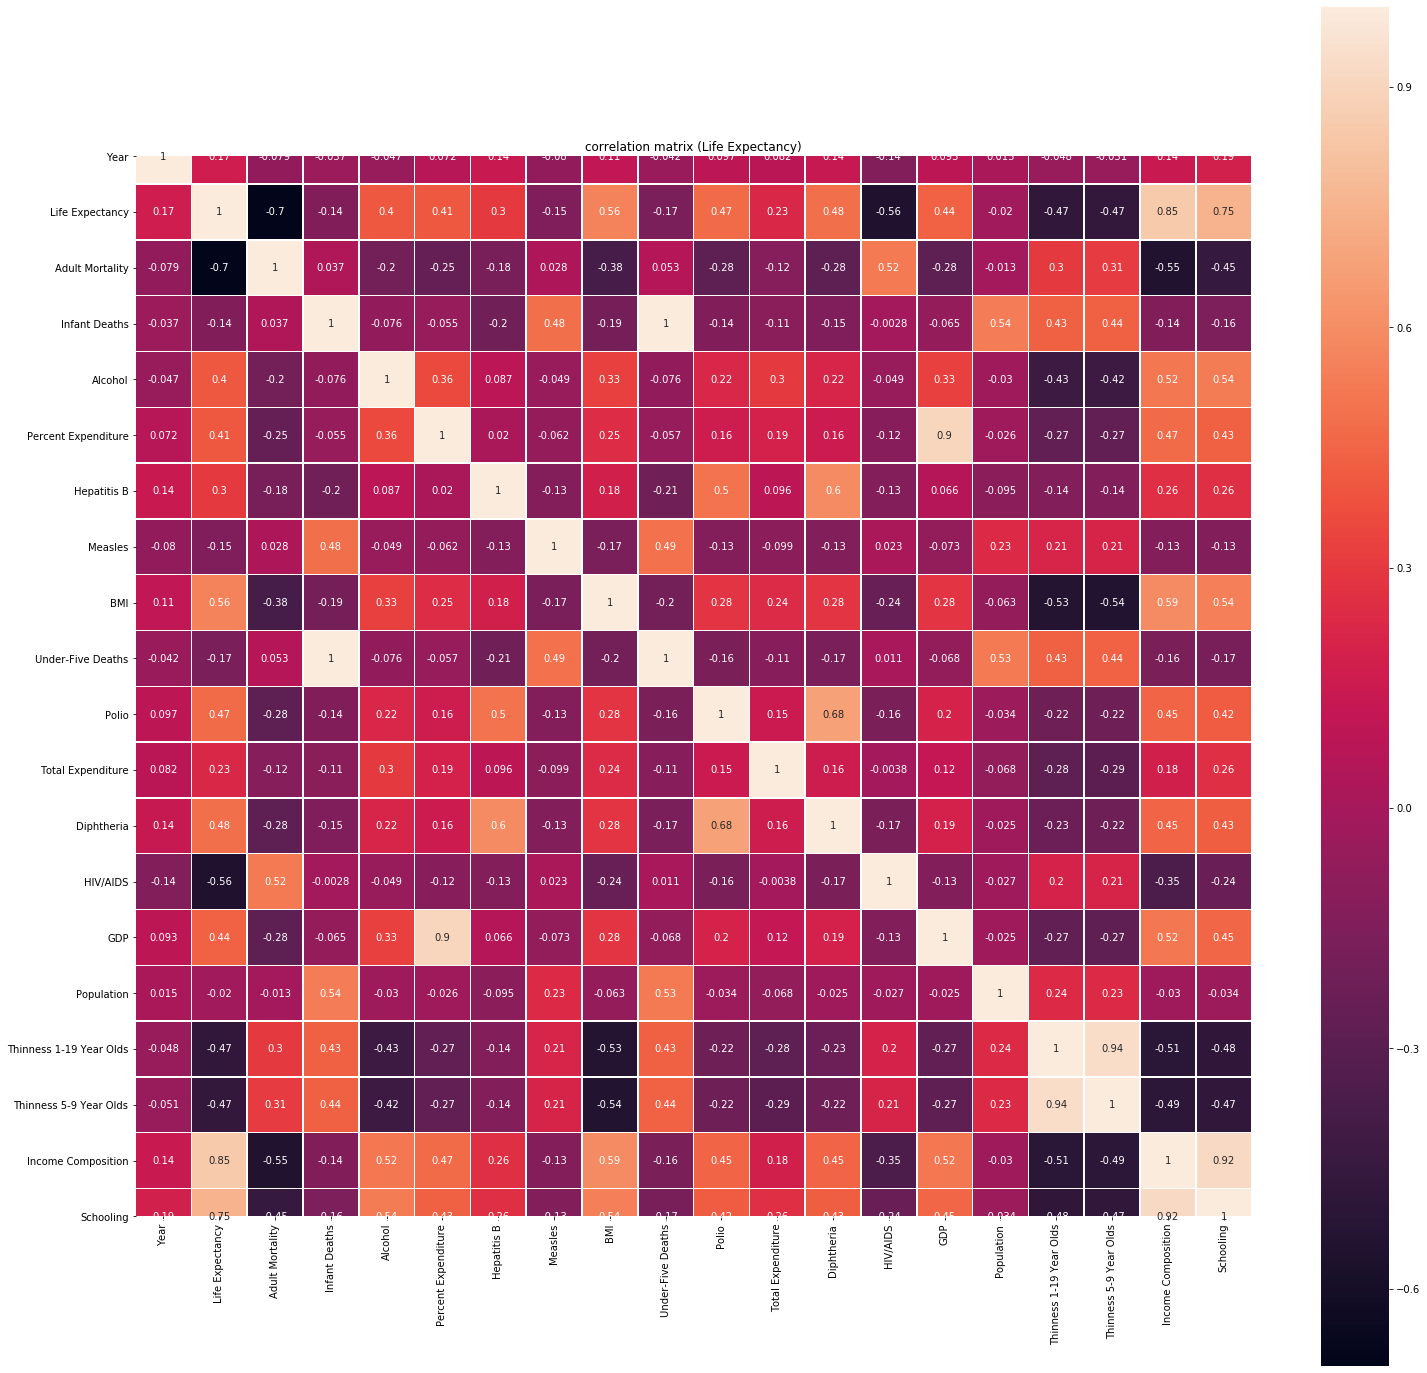

In [18]:
corrmat_life_expec = life_expec_df.corr()

plt.figure(figsize=(25,25))
sns.heatmap(corrmat_life_expec, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Life Expectancy)")
plt.show()

Schooling and Income Composition are the most strongly correlated with Life Expectancy, but they're also very correlated with each other. Upon further research the "Income Composition" variable is really the Human Development Index, which has a life expectancy and schooling component so it makes sense that it is highly correlated with both and should probably be discarded since it isn't independent. GDP, Diphtheria, Polio, BMI, and Percent Expenditure are somewhat correlated with Life Expectancy as well. Adult Mortality, HIV/AIDS, Thinness 1-19 and 5-9 are the most negatively correlated. 

## In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

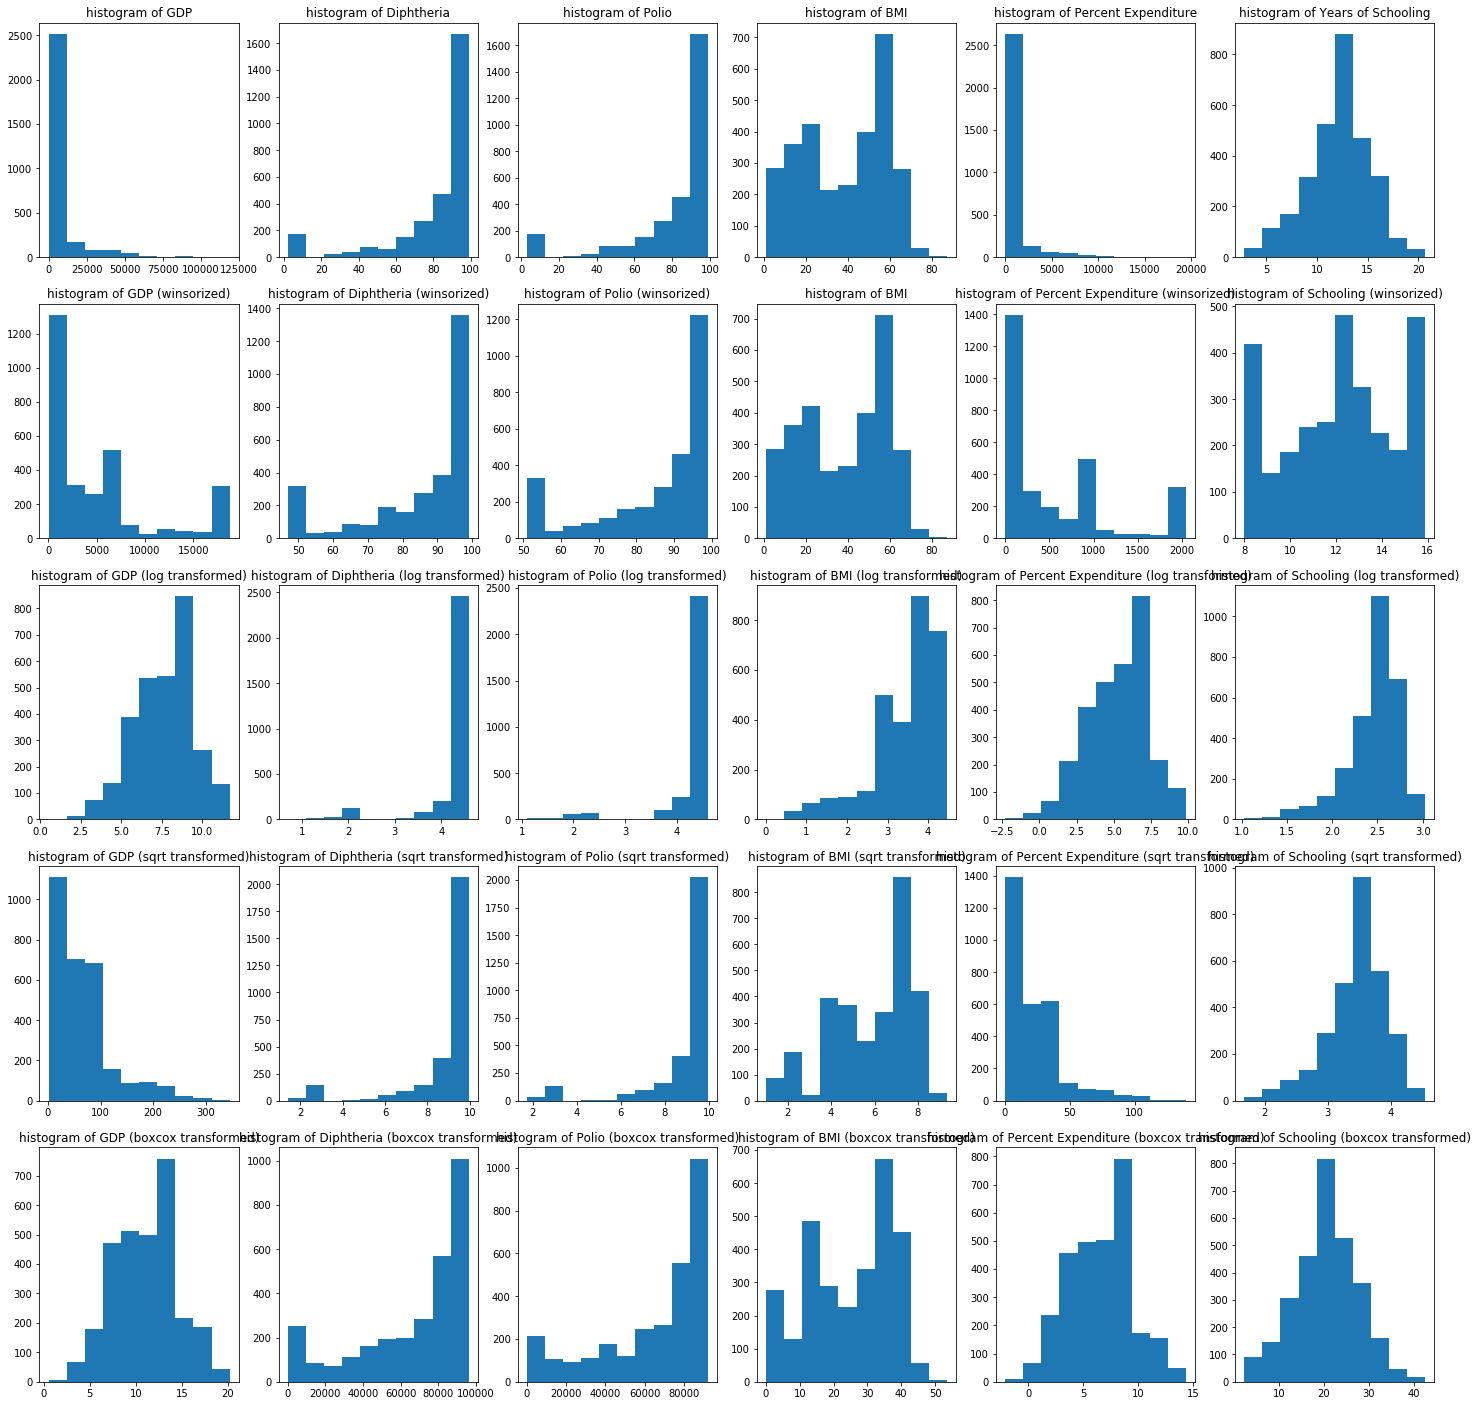

In [22]:
life_expec_df = life_expec_df[["Life Expectancy", "GDP", "Diphtheria", "Polio", "BMI", "Percent Expenditure", "Schooling"]]

gdp_boxcox,_ = boxcox(life_expec_df["GDP"])
diphtheria_boxcox,_ = boxcox(life_expec_df["Diphtheria"])
polio_boxcox,_ = boxcox(life_expec_df["Polio"])
bmi_boxcox,_ = boxcox(life_expec_df["BMI"])
expenditure_boxcox,_ = boxcox(life_expec_df["Percent Expenditure"])
schooling_boxcox,_ = boxcox(life_expec_df["Schooling"])


plt.figure(figsize=(25,25))

# histograms of the original data
plt.subplot(5, 6, 1)
plt.hist(life_expec_df["GDP"])
plt.title("histogram of GDP")

plt.subplot(5, 6, 2)
plt.hist(life_expec_df["Diphtheria"])
plt.title("histogram of Diphtheria")

plt.subplot(5, 6, 3)
plt.hist(life_expec_df["Polio"])
plt.title("histogram of Polio")

plt.subplot(5, 6, 4)
plt.hist(life_expec_df["BMI"])
plt.title("histogram of BMI")

plt.subplot(5, 6, 5)
plt.hist(life_expec_df["Percent Expenditure"])
plt.title("histogram of Percent Expenditure")

plt.subplot(5, 6, 6)
plt.hist(life_expec_df["Schooling"])
plt.title("histogram of Years of Schooling")

# histograms of the winsorized data
plt.subplot(5, 6, 7)
plt.hist(win_life_expec_df["GDP"]) 
plt.title("histogram of GDP (winsorized)")

plt.subplot(5, 6, 8)
plt.hist(win_life_expec_df["Diphtheria"])
plt.title("histogram of Diphtheria (winsorized)")

plt.subplot(5, 6, 9)
plt.hist(win_life_expec_df["Polio"])
plt.title("histogram of Polio (winsorized)")

plt.subplot(5, 6, 10)
plt.hist(life_expec_df["BMI"]) #didn't need to winsorize
plt.title("histogram of BMI")

plt.subplot(5, 6, 11)
plt.hist(win_life_expec_df["Percent Expenditure"])
plt.title("histogram of Percent Expenditure (winsorized)")

plt.subplot(5, 6, 12)
plt.hist(win_life_expec_df["Schooling"])
plt.title("histogram of Schooling (winsorized)")

# histograms of the log transformed data
plt.subplot(5, 6, 13)
plt.hist(np.log(life_expec_df["GDP"]))
plt.title("histogram of GDP (log transformed)")

plt.subplot(5, 6, 14)
plt.hist(np.log(life_expec_df["Diphtheria"]))
plt.title("histogram of Diphtheria (log transformed)")

plt.subplot(5, 6, 15)
plt.hist(np.log(life_expec_df["Polio"]))
plt.title("histogram of Polio (log transformed)")

plt.subplot(5, 6, 16)
plt.hist(np.log(life_expec_df["BMI"]))
plt.title("histogram of BMI (log transformed)")

plt.subplot(5, 6, 17)
plt.hist(np.log(life_expec_df["Percent Expenditure"]))
plt.title("histogram of Percent Expenditure (log transformed)")

plt.subplot(5, 6, 18)
plt.hist(np.log(life_expec_df["Schooling"]))
plt.title("histogram of Schooling (log transformed)")

# histograms of the sqrt transformed data
plt.subplot(5, 6, 19)
plt.hist(np.sqrt(life_expec_df["GDP"]))
plt.title("histogram of GDP (sqrt transformed)")

plt.subplot(5, 6, 20)
plt.hist(np.sqrt(life_expec_df["Diphtheria"]))
plt.title("histogram of Diphtheria (sqrt transformed)")

plt.subplot(5, 6, 21)
plt.hist(np.sqrt(life_expec_df["Polio"]))
plt.title("histogram of Polio (sqrt transformed)")

plt.subplot(5, 6, 22)
plt.hist(np.sqrt(life_expec_df["BMI"]))
plt.title("histogram of BMI (sqrt transformed)")

plt.subplot(5, 6, 23)
plt.hist(np.sqrt(life_expec_df["Percent Expenditure"]))
plt.title("histogram of Percent Expenditure (sqrt transformed)")

plt.subplot(5, 6, 24)
plt.hist(np.sqrt(life_expec_df["Schooling"]))
plt.title("histogram of Schooling (sqrt transformed)")

# histograms of the boxcox transformed data
plt.subplot(5, 6, 25)
plt.hist(gdp_boxcox)
plt.title("histogram of GDP (boxcox transformed)")

plt.subplot(5, 6, 26)
plt.hist(diphtheria_boxcox)
plt.title("histogram of Diphtheria (boxcox transformed)")

plt.subplot(5, 6, 27)
plt.hist(polio_boxcox)
plt.title("histogram of Polio (boxcox transformed)")

plt.subplot(5, 6, 28)
plt.hist(bmi_boxcox)
plt.title("histogram of BMI (boxcox transformed)")

plt.subplot(5, 6, 29)
plt.hist(expenditure_boxcox)
plt.title("histogram of Percent Expenditure (boxcox transformed)")

plt.subplot(5, 6, 30)
plt.hist(schooling_boxcox)
plt.title("histogram of Schooling (boxcox transformed)")

plt.show()


## Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

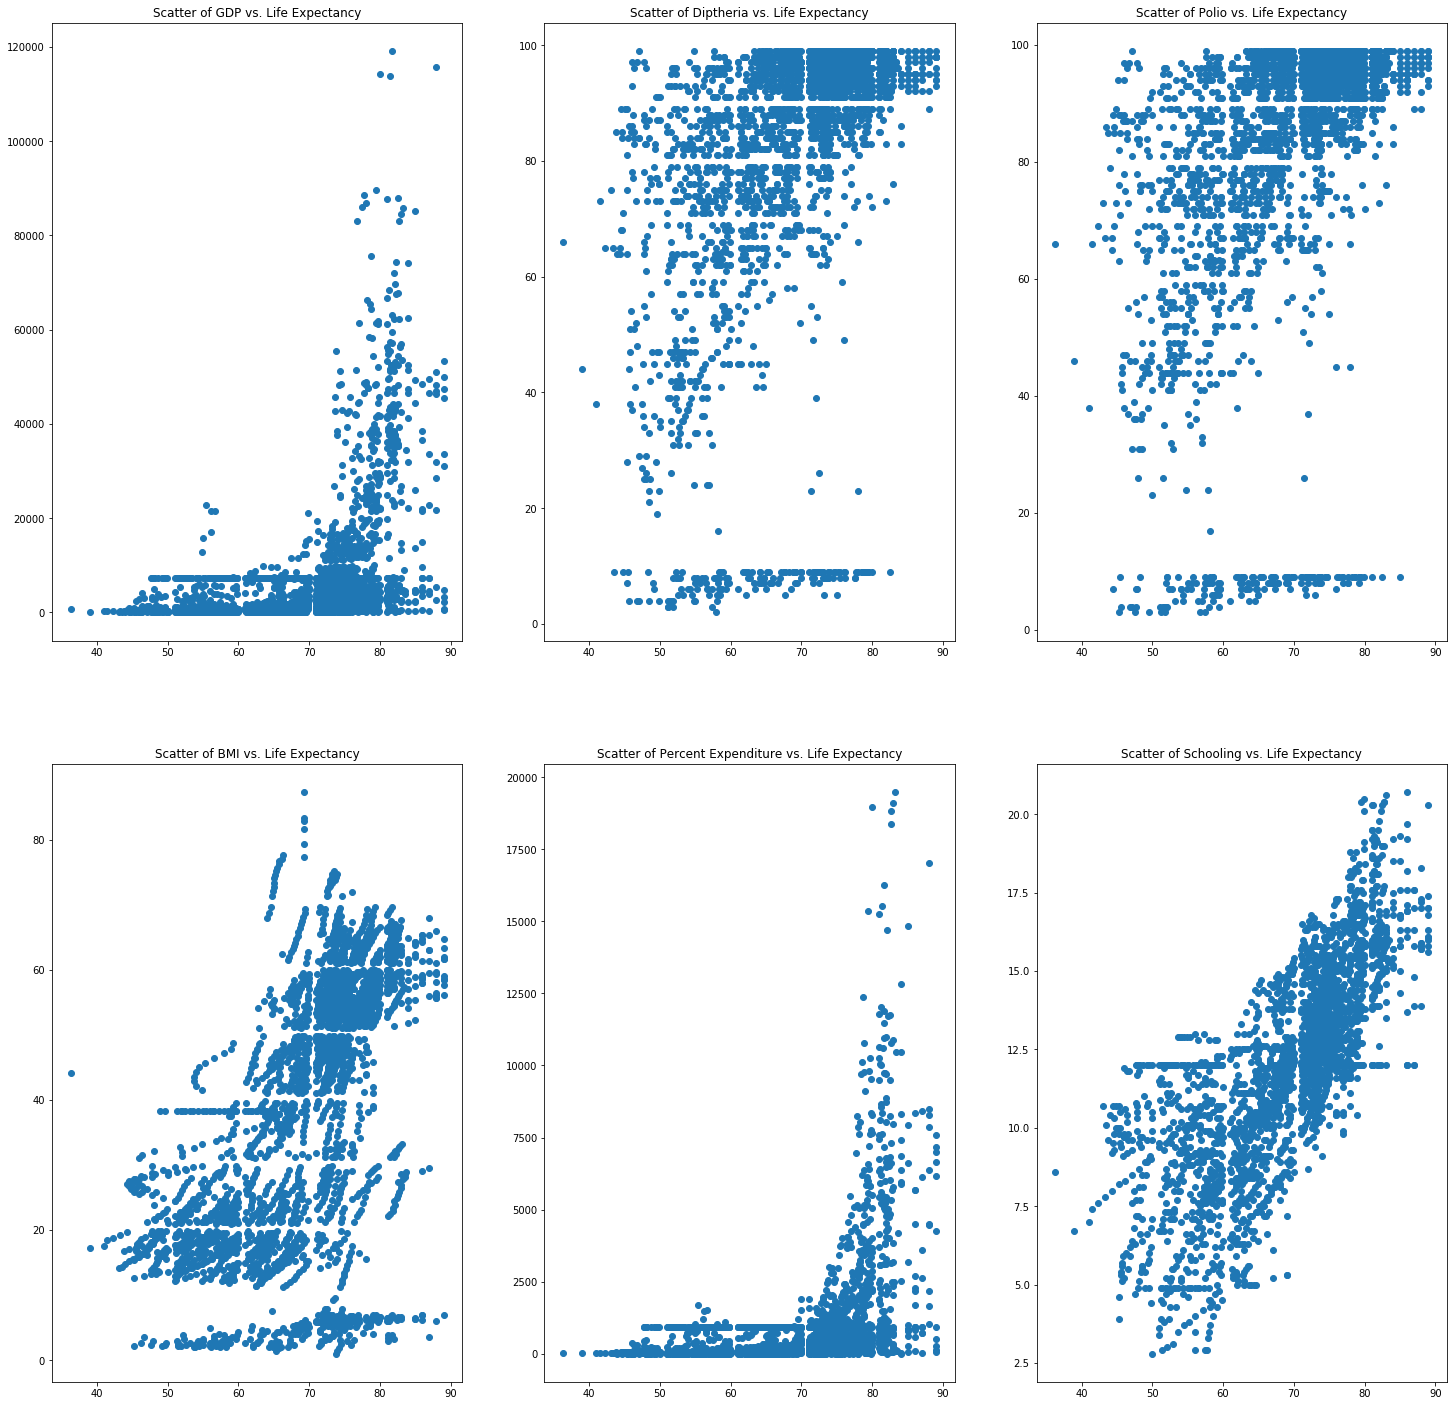

In [24]:
plt.figure(figsize=(25,25))

plt.subplot(2, 3, 1)
plt.scatter(life_expec_df["Life Expectancy"], life_expec_df["GDP"])
plt.title("Scatter of GDP vs. Life Expectancy")

plt.subplot(2, 3, 2)
plt.scatter(life_expec_df["Life Expectancy"], life_expec_df["Diphtheria"])
plt.title("Scatter of Diptheria vs. Life Expectancy")

plt.subplot(2, 3, 3)
plt.scatter(life_expec_df["Life Expectancy"], life_expec_df["Polio"])
plt.title("Scatter of Polio vs. Life Expectancy")

plt.subplot(2, 3, 4)
plt.scatter(life_expec_df["Life Expectancy"], life_expec_df["BMI"])
plt.title("Scatter of BMI vs. Life Expectancy")

plt.subplot(2, 3, 5)
plt.scatter(life_expec_df["Life Expectancy"], life_expec_df["Percent Expenditure"])
plt.title("Scatter of Percent Expenditure vs. Life Expectancy")

plt.subplot(2, 3, 6)
plt.scatter(life_expec_df["Life Expectancy"], life_expec_df["Schooling"])
plt.title("Scatter of Schooling vs. Life Expectancy")

plt.show()

The above scatter plots show the most highly correlated independent factors supporting a longer life expectancy are how many years of schooling a child receives, what percentage of GDP a country spends on its health services, the average BMI of its citizens, the immunization rates of its children and the overall GDP per capita.